# **Data Wrangling**

## **Step 1) Load Dataset**

In [73]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ledprofio/lrrf_model_comparison_solubility/main/solubility_data.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **Step 2) Data Preparation**

In [74]:
#Preparation of target values
y = df['logS']
y

#Preparation of feature values
x = df.drop('logS', axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## **Step 3) Data Splitting**

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

x_train
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


# **Linear Regression Model**

## **Step 1) Model Building**

In [76]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

## **Step 2) Model Prediction**

In [77]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

## **Step 3) Evaluate Model Performance**

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [79]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R-Squared (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R-Squared (Test): ', lr_test_r2)

LR MSE (Train):  1.0075362951093687
LR R-Squared (Train):  0.7645051774663391
LR MSE (Test):  1.0206953660861033
LR R-Squared (Test):  0.7891616188563282


In [80]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R-Squared', 'Test MSE', 'Test R-Squared']
lr_results

,Method,Training MSE,Training R-Squared,Test MSE,Test R-Squared
0,Linear regression,1.007536,0.764505,1.020695,0.789162


# **Random Forest Model**

## **Step 1) Model Training**

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

## **Step 2) Model Prediction**

In [82]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

## **Step 3) Evaluate Model Performance**

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [84]:
print('RF MSE (Train): ', rf_train_mse)
print('RF R-Squared (Train): ', rf_train_r2)
print('RF MSE (Test): ', rf_test_mse)
print('RF R-Squared (Test): ', rf_test_r2)

RF MSE (Train):  1.028227802112806
RF R-Squared (Train):  0.7596688824431413
RF MSE (Test):  1.407688264904896
RF R-Squared (Test):  0.7092230211002489


In [85]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R-Squared', 'Test MSE', 'Test R-Squared']
rf_results

,Method,Training MSE,Training R-Squared,Test MSE,Test R-Squared
0,Random forest,1.028228,0.759669,1.407688,0.709223


# **Model Comparison**

In [29]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R-Squared,Test MSE,Test R-Squared
0,Linear regression,1.007536,0.764505,1.020695,0.789162
0,Random forest,1.028228,0.759669,1.407688,0.709223


In [30]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R-Squared,Test MSE,Test R-Squared
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Random forest,1.028228,0.759669,1.407688,0.709223


# **Data Visualization**

Text(0, 0.5, 'Predicted')

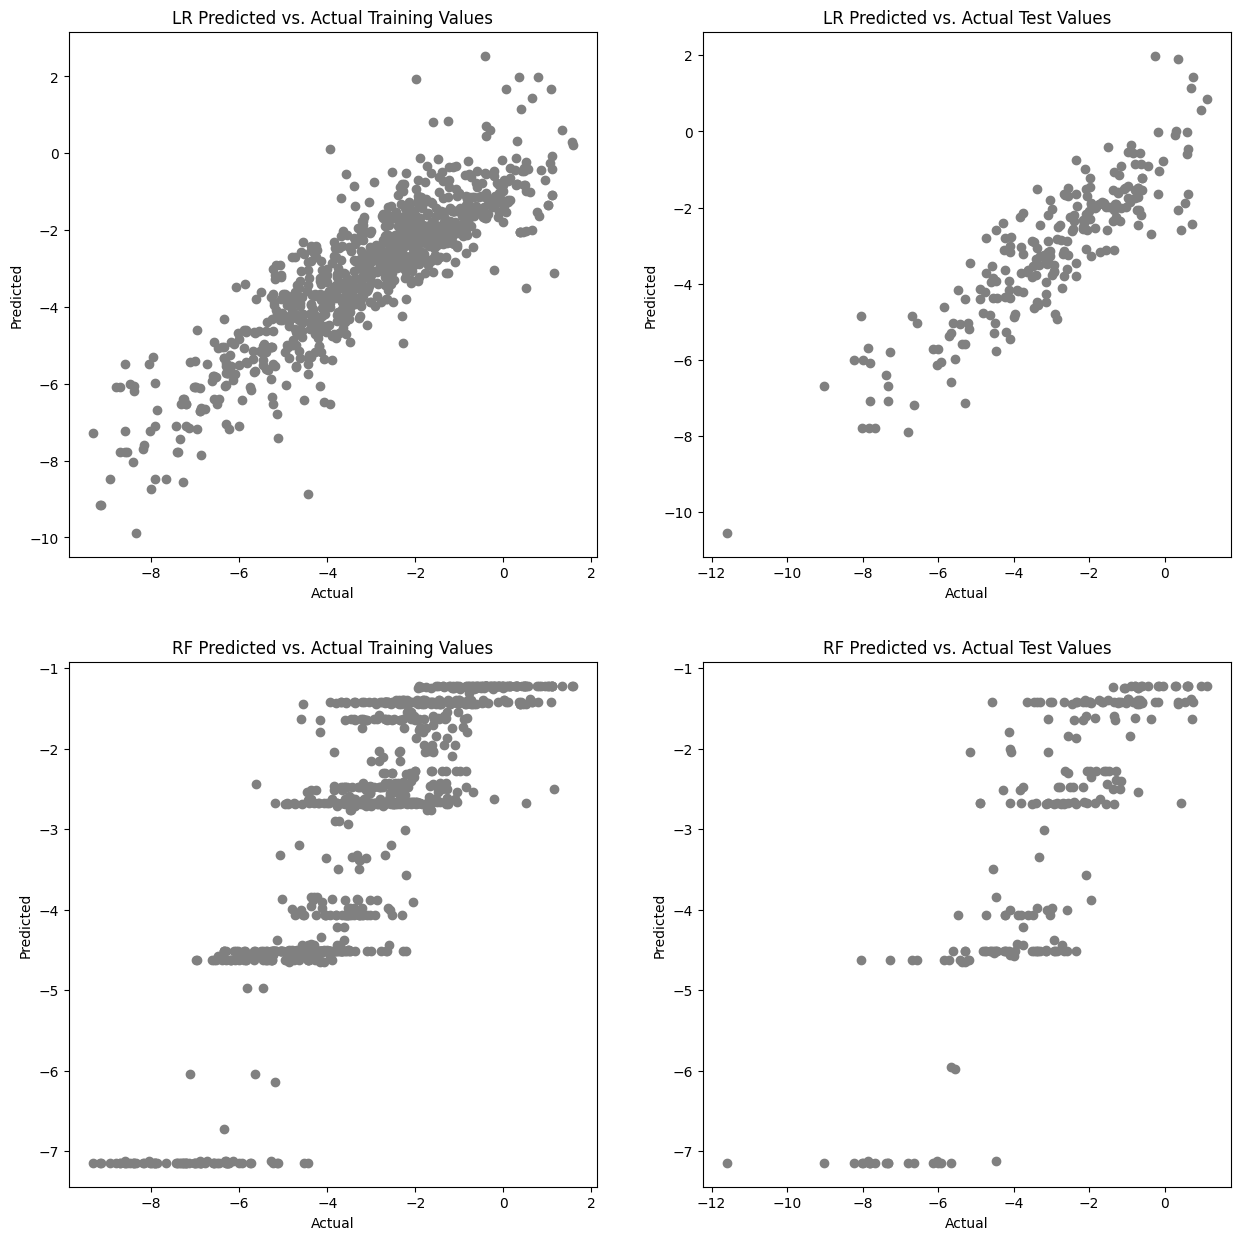

In [72]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(15,15))

axs[0, 0].scatter(y_train, y_lr_train_pred, color='grey')
axs[0, 0].set_title('LR Predicted vs. Actual Training Values')
axs[0, 0].set_xlabel('Actual')
axs[0, 0].set_ylabel('Predicted')

axs[0, 1].scatter(y_test, y_lr_test_pred, color='grey')
axs[0, 1].set_title('LR Predicted vs. Actual Test Values')
axs[0, 1].set_xlabel('Actual')
axs[0, 1].set_ylabel('Predicted')

axs[1, 0].scatter(y_train, y_rf_train_pred, color='grey')
axs[1, 0].set_title('RF Predicted vs. Actual Training Values')
axs[1, 0].set_xlabel('Actual')
axs[1, 0].set_ylabel('Predicted')

axs[1, 1].scatter(y_test, y_rf_test_pred, color='grey')
axs[1, 1].set_title('RF Predicted vs. Actual Test Values')
axs[1, 1].set_xlabel('Actual')
axs[1, 1].set_ylabel('Predicted')